# Problem 2.1

In [73]:
import numpy as np

# Generating some 3D data
data = np.loadtxt('pc1.csv', delimiter=',') #<----Please mention file path in quotes here if Spyder IDE is not used

x= data[:,0]
y= data[:,1]
z= data[:,2]
X= np.column_stack([x, y,z])

# Calculate the means of each variable
x_mean = np.mean(x)
y_mean = np.mean(y)
z_mean = np.mean(z)

# Calculate the deviations from the means
x_dev = x - x_mean
y_dev = y - y_mean
z_dev = z - z_mean

# Calculate the covariance matrix
n = len(x)
covariance_matrix = np.array([[np.sum(x_dev**2), np.sum(x_dev*y_dev), np.sum(x_dev*z_dev)],
                              [np.sum(x_dev*y_dev), np.sum(y_dev**2), np.sum(y_dev*z_dev)],
                              [np.sum(x_dev*z_dev), np.sum(y_dev*z_dev), np.sum(z_dev**2)]]) / (n)

print("Covariance matrix:")
print(covariance_matrix)


# Extract the eigenvectors and eigenvalues from the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Get the index of the eigenvector corresponding to the smallest eigenvalue
min_eigenvalue_idx = np.argmin(eigenvalues)

# The eigenvector corresponding to the smallest eigenvalue is the direction of the surface normal
surface_normal = eigenvectors[min_eigenvalue_idx]

# Compute the magnitude of the surface normal
magnitude = eigenvalues[min_eigenvalue_idx]
print("The eigenvector corresponding to the smallest eigenvalue is the direction of the surface normal")
print(surface_normal,"\n")
print("Magnitude of surface normal:", magnitude)

Covariance matrix:
[[ 33.6375584   -0.82238647 -11.3563684 ]
 [ -0.82238647  35.07487427 -23.15827057]
 [-11.3563684  -23.15827057  20.5588948 ]]
The eigenvector corresponding to the smallest eigenvalue is the direction of the surface normal
[ 0.28616428  0.90682723 -0.30947435] 

Magnitude of surface normal: 0.6672780805108618


# Problem 2.2----- Standard least squares

In [74]:
# fitting the data using standard least square:

#EQUATION OF A PLANE :------> Z= ax + bY +d

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

#READ THE DATA USING NUMPY

data1 = np.loadtxt('pc1.csv', delimiter=',') 
X1= data1[:,0]
Y1= data1[:,1]
Z1= data1[:,2]

data2 = np.loadtxt('pc2.csv', delimiter=',') 
X2= data2[:,0]
Y2= data2[:,1]
Z2= data2[:,2]

In [76]:
def SLS(X,Y,Z):
    A = np.stack((X,Y,np.ones(X.shape)),axis = 1 )
    B = np.linalg.inv(A.T@A)@(A.T@Z)
    return B, A

In [77]:
SLS_DATA1 = SLS(X1,Y1,Z1)
SLS_DATA2 = SLS(X2,Y2,Z2)

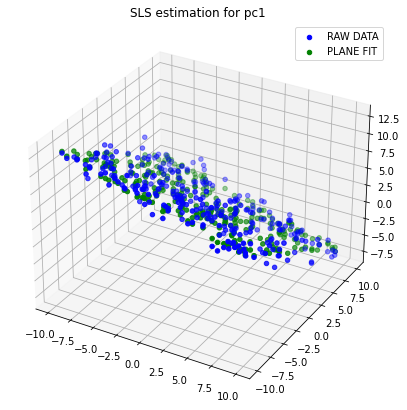

In [78]:
C = SLS_DATA1[0]
y, x = sp.symbols('y x')
z =  C[0]*x + C[1] * y  + C[2]
plane_x = []
plane_y = []
plane_z = []
for i,j in zip(X1, Y1):
    z_val_sub = z.subs([(x,i), (y,j)])
    plane_z.append(z_val_sub)
    plane_x.append(i)
    plane_y.append(j)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X1, Y1, Z1, color = "blue")
ax.scatter3D(plane_x, plane_y, plane_z, color = "green")
ax.legend(["RAW DATA","PLANE FIT"])
plt.title("SLS estimation for pc1")
plt.show()

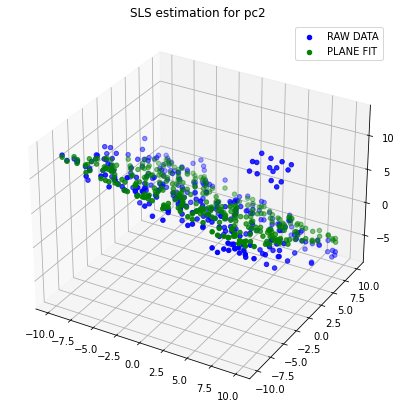

In [79]:
C = SLS_DATA2[0]
y, x = sp.symbols('y x')
z =  C[0]*x + C[1] * y  + C[2]
plane_x = []
plane_y = []
plane_z = []
for i,j in zip(X2, Y2):
    z_val_sub = z.subs([(x,i), (y,j)])
    plane_z.append(z_val_sub)
    plane_x.append(i)
    plane_y.append(j)

    # Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
    
    # Creating plot
ax.scatter3D(X2, Y2, Z2, color = "blue")
ax.scatter3D(plane_x, plane_y, plane_z, color = "green")
ax.legend(["RAW DATA","PLANE FIT"])
plt.title("SLS estimation for pc2")
plt.show()

# Problem 2.2----- Total least squares

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

#READ THE DATA USING NUMPY

data1 = np.loadtxt('pc1.csv', delimiter=',') 
X1= data1[:,0]
Y1= data1[:,1]
Z1= data1[:,2]

data2 = np.loadtxt('pc2.csv', delimiter=',') 
X2= data2[:,0]
Y2= data2[:,1]
Z2= data2[:,2]

In [81]:
def TLS(X,Y,Z):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    Z_mean = np.mean(Z)
    U = np.stack((X-X_mean, Y-Y_mean, Z - Z_mean),axis = 1)
    mat = U.T@U
    mat /= np.linalg.norm(mat)
    eig_values, eig_vecs = np.linalg.eig(mat)
    small_eig_val_idx = np.argmin(eig_values)
    qa = eig_vecs[:,small_eig_val_idx]
    return qa, (X_mean,Y_mean,Z_mean)


In [82]:
TLS_DATA1 = TLS(X1,Y1,Z1)
TLS_DATA2 = TLS(X2,Y2,Z2)

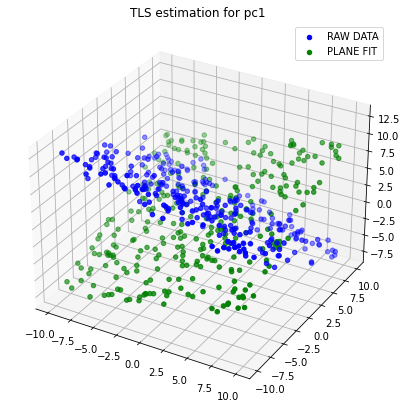

In [83]:
C = TLS_DATA1[0]
y, x = sp.symbols('y x')
z =  C[0]*x + C[1] * y  + C[2]
plane_x = []
plane_y = []
plane_z = []
for i,j in zip(X1, Y1):
    z_val_sub = z.subs([(x,i), (y,j)])
    plane_z.append(z_val_sub)
    plane_x.append(i)
    plane_y.append(j)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X1, Y1, Z1, color = "blue")
ax.scatter3D(plane_x, plane_y, plane_z, color = "green")
ax.legend(["RAW DATA","PLANE FIT"])
plt.title("TLS estimation for pc1")
plt.show()

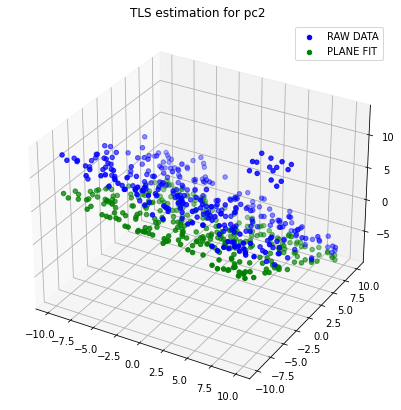

In [144]:
C = TLS_DATA2[0]
y, x = sp.symbols('y x')
z =  C[0]*x + C[1] * y  + C[2]
plane_x = []
plane_y = []
plane_z = []
for i,j in zip(X1, Y1):
    z_val_sub = z.subs([(x,i), (y,j)])
    plane_z.append(z_val_sub)
    plane_x.append(i)
    plane_y.append(j)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X2, Y2, Z2, color = "blue")
ax.scatter3D(plane_x, plane_y, plane_z, color = "green")
ax.legend(["RAW DATA","PLANE FIT"])
plt.title("TLS estimation for pc2")
plt.show()

# Problem 2.2----- RANSAC

Best Model: [-0.35215629 -0.7582145   3.28396253]
Number of Inliers: 4


<Figure size 432x288 with 0 Axes>

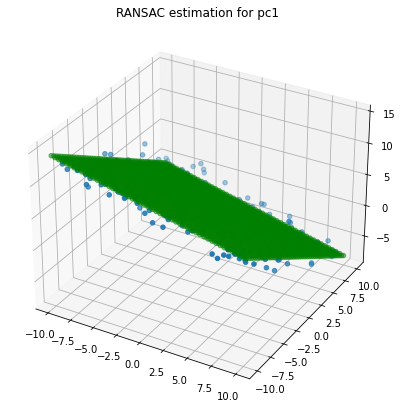

In [147]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("pc1.csv", header=None)
data = data.values

# Set the RANSAC parameters
n = 10 # number of points to sample for each iteration
k = 1000 # maximum number of iterations
t = 0.1 # threshold for a point to be considered an inlier
d = 3 # number of inliers required to consider the model valid

# Define a function to fit a plane to a set of points using least squares
def fit_plane(x, y, z):
    A = np.column_stack((x, y, np.ones_like(x)))
    b = z
    coeffs = np.linalg.inv(A.T @ A) @ A.T @ b
    return coeffs

# Define a function to calculate the distance between a point and a plane
def point_to_plane_distance(x, y, z, coeffs):
    a, b, c = coeffs
    dist = abs(a*x + b*y + c*z + d) / np.sqrt(a**2 + b**2 + c**2)
    return dist

# Initialize variables to keep track of the best model
best_model = None
best_inliers = None
best_num_inliers = 0

# Iterate k times
for i in range(k):
    # Select n random points
    indices = np.random.choice(data.shape[0], n, replace=False)
    points = data[indices]

    # Fit a plane to the points
    coeffs = fit_plane(points[:, 0], points[:, 1], points[:, 2])

    # Calculate the distances between each point and the plane
    distances = np.zeros(data.shape[0])
    for j in range(data.shape[0]):
        distances[j] = point_to_plane_distance(data[j, 0], data[j, 1], data[j, 2], coeffs)

    # Determine the inliers
    inliers = np.where(distances < t)[0]
    num_inliers = len(inliers)

    # Update the best model if this one is better
    if num_inliers > best_num_inliers:
        best_model = coeffs
        best_inliers = inliers
        best_num_inliers = num_inliers

    # Stop if we have enough inliers
    if best_num_inliers >= d:
        break

# Print the best model and inliers
print("Best Model:", best_model)
print("Number of Inliers:", best_num_inliers)

# Plot the original data and the best model
fig = plt.figure()
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
x_surf, y_surf = np.meshgrid(np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 50),
                             np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 50))
z_surf = best_model[0]*x_surf + best_model[1]*y_surf + best_model[2]
ax.scatter(x_surf, y_surf, z_surf, alpha=0.5, color='green')
plt.title("RANSAC estimation for pc1")
plt.show()




Best Model: [-0.33876067 -0.66181984  2.68371383]
Number of Inliers: 5


<Figure size 432x288 with 0 Axes>

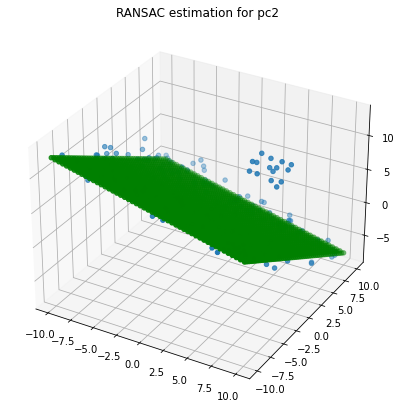

In [148]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("pc2.csv", header=None)
data = data.values

# Set the RANSAC parameters
n = 10 # number of points to sample for each iteration
k = 1000 # maximum number of iterations
t = 0.1 # threshold for a point to be considered an inlier
d = 3 # number of inliers required to consider the model valid

# Define a function to fit a plane to a set of points using least squares
def fit_plane(x, y, z):
    A = np.column_stack((x, y, np.ones_like(x)))
    b = z
    coeffs = np.linalg.inv(A.T @ A) @ A.T @ b
    return coeffs

# Define a function to calculate the distance between a point and a plane
def point_to_plane_distance(x, y, z, coeffs):
    a, b, c = coeffs
    dist = abs(a*x + b*y + c*z + d) / np.sqrt(a**2 + b**2 + c**2)
    return dist

# Initialize variables to keep track of the best model
best_model = None
best_inliers = None
best_num_inliers = 0

# Iterate k times
for i in range(k):
    # Select n random points
    indices = np.random.choice(data.shape[0], n, replace=False)
    points = data[indices]

    # Fit a plane to the points
    coeffs = fit_plane(points[:, 0], points[:, 1], points[:, 2])

    # Calculate the distances between each point and the plane
    distances = np.zeros(data.shape[0])
    for j in range(data.shape[0]):
        distances[j] = point_to_plane_distance(data[j, 0], data[j, 1], data[j, 2], coeffs)

    # Determine the inliers
    inliers = np.where(distances < t)[0]
    num_inliers = len(inliers)

    # Update the best model if this one is better
    if num_inliers > best_num_inliers:
        best_model = coeffs
        best_inliers = inliers
        best_num_inliers = num_inliers

    # Stop if we have enough inliers
    if best_num_inliers >= d:
        break

# Print the best model and inliers
print("Best Model:", best_model)
print("Number of Inliers:", best_num_inliers)

# Plot the original data and the best model
fig = plt.figure()
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
x_surf, y_surf = np.meshgrid(np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 50),
                             np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 50))
z_surf = best_model[0]*x_surf + best_model[1]*y_surf + best_model[2]
ax.scatter(x_surf, y_surf, z_surf,  color='green')
plt.title("RANSAC estimation for pc2")
plt.show()


